# Random Forest

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import QuantileTransformer

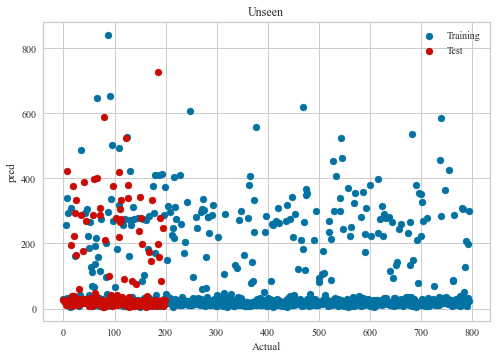

In [176]:
Data=pd.read_csv('1000_sample.csv')
X = Data[Data.columns[1:23]]
y = Data[ Data.columns[23]]
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=22)

plt.figure()
ind = np.arange(len(y)) 
plt.scatter(ind,y, color="b",label="Training")
ind = np.arange(len(y_Test))
plt.scatter(ind,y_Test, color="r",label="Test")
plt.title("Unseen")
plt.xlabel("Actual")
plt.ylabel("pred")
plt.legend(loc="best")
plt.show()

In [2]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[23]]

In [3]:
# n_estimators = [160,180]
# max_features = ['auto','sqrt']
# max_depth = [19,20]
# min_samples_split = [3,4]
# min_samples_leaf = [3,4]
# criterion=['mse','mae']
n_estimators = [150,160,175,200]
# max_features = ['auto','sqrt']
max_depth = [5,6,7]
min_samples_split = [4,5,6]
min_samples_leaf = [2,3,4]
# criterion=['mse','mae']
# warm_start=[True,False]
# oob_score=[True,False]
# bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
#                'criterion': criterion,
#                'warm_start': warm_start,
#                'oob_score': oob_score,
#                'bootstrap': bootstrap
              }

In [4]:
dd=QuantileTransformer(output_distribution='normal')
yv=y.to_numpy()
yv=yv.reshape(-1, 1)
yt=dd.fit_transform(yv)
# First create the base model to tune
rf = RandomForestRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,yt)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (995). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 108 is smaller than n_iter=150. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.6min finished
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [4, 5, 6],
                                        'n_estimators': [150, 160, 175, 200]},
                   random_state=42, verbose=2)

In [5]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=150)

In [3]:
modo=RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=6,n_estimators=150)
# mod = TransformedTargetRegressor(regressor=modo,func=np.log,inverse_func=np.exp)

mod = TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))

In [4]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [5]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[23]]
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=1)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])


C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings

<Figure size 576x396 with 0 Axes>

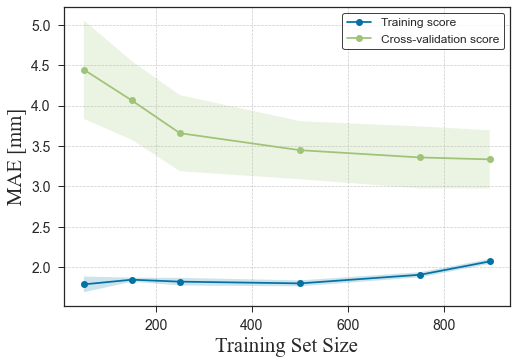

In [6]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()

plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE [mm]", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('rfLC', bbox_inches="tight")
plt.show()

In [7]:
pd.DataFrame(test_mean)

,0
0,4.443980
1,4.062719
2,3.658263
3,3.447835
4,3.357969
5,3.334386


In [9]:
X = X.to_numpy()
y = y.to_numpy()


In [10]:
y_Test=y_Test.to_numpy()

In [11]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 6.838419



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 3.877834



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 5.081221



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 3.509535



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.693944



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.942645



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 5.272134



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.884137



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.125522



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.401024

error COV--->0    0.978635
dtype: float64  error mean --->0    2.993372
Name: mean, dtype: float64  error std --->0    2.929418
Name: std, dtype: float64


# train score

In [12]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.054822
dtype: float64  error mean --->0    2.116385
Name: mean, dtype: float64  error std --->0    2.232408
Name: std, dtype: float64


In [13]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,0.064094
std,3.076402
min,-20.558272
25%,-1.488701
50%,-0.002057
75%,1.569110
max,18.242267


In [15]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-0.176893
std,4.189937
min,-16.679018
25%,-2.703244
50%,0.000000
75%,2.152827
max,24.595313


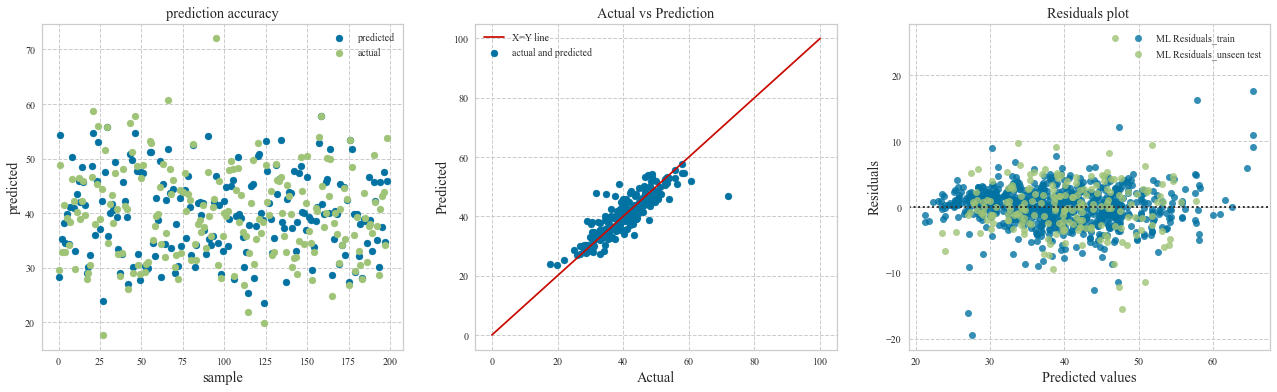

In [12]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,100],[0,100],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()


plt.show()

# Gradient

In [2]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor

In [3]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[23]]

In [18]:
random_grid = {"learning_rate"   : [0.05,0.06,0.065],
             "subsample"        : [0.1,0.2,0.3],
             "n_estimators": [200,250,300],
             'max_depth'        : [2,3,4],
             "max_features"     : ['auto', 'sqrt'],
             "min_samples_split": [0.1,0.15,0.2],
             "min_samples_leaf" : [0.05,0.055,0.06]
             }

In [19]:
dd=QuantileTransformer(output_distribution='normal')
yv=y.to_numpy()
yv=yv.reshape(-1, 1)
yt=dd.fit_transform(yv)
rf = GradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 400, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,yt)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (995). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  2.5min finished
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=400,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.06, 0.065],
                                        'max_depth': [2, 3, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [0.05, 0.055, 0.06],
                                        'min_samples_split': [0.1, 0.15, 0.2],
                                        'n_estimators': [200, 250, 300],
                                        'subsample': [0.1, 0.2, 0.3]},
                   random_state=42, verbose=2)

In [20]:
rf_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_features='auto',
                          min_samples_leaf=0.05, min_samples_split=0.1,
                          n_estimators=300, subsample=0.3)

In [122]:
from sklearn.preprocessing import QuantileTransformer,PowerTransformer

In [4]:
Data=pd.read_csv('1000_2out.csv')
X=Data[Data.columns[1:23]]
y=Data[Data.columns[23]]

In [5]:
modo=GradientBoostingRegressor(learning_rate=0.03, max_features='auto',min_samples_leaf=0.05, min_samples_split=0.1,n_estimators=300, subsample=0.9,max_depth=6)


# mod = TransformedTargetRegressor(regressor=modo,func=np.log,inverse_func=np.exp)
mod = TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))

In [10]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [13]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=24)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])


C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings

<Figure size 576x396 with 0 Axes>

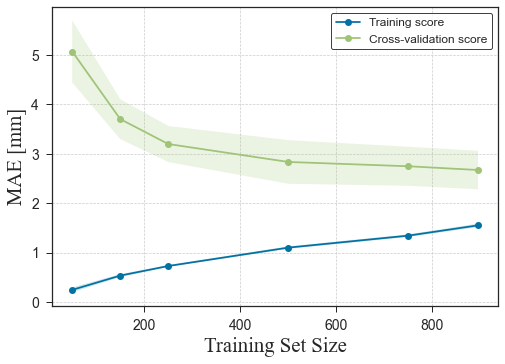

In [14]:

# train_mean=-np.mean(train_score,axis=1)
# train_std=-np.std(train_score,axis=1)
# test_mean=-np.mean(test_score,axis=1)
# test_std=-np.std(test_score,axis=1)
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE [mm]", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('dmax_gradLC', bbox_inches="tight")
plt.show()

In [15]:
pd.DataFrame(test_mean)

,0
0,5.070216
1,3.701597
2,3.197269
3,2.834205
4,2.747083
5,2.671327


In [6]:
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=24)

In [7]:
X = X.to_numpy()
y = y.to_numpy()

In [8]:
y_Test=y_Test.to_numpy()

In [11]:
kf=cv
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 5.458362



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 3.958570



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 3.637491



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 3.835274



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.167143



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.548386



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 3.600879



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 5.271337



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 5.592259



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 4.091063

error COV--->0    1.061953
dtype: float64  error mean --->0    2.724618
Name: mean, dtype: float64  error std --->0    2.893417
Name: std, dtype: float64


# train score

In [12]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.362901
dtype: float64  error mean --->0    1.565345
Name: mean, dtype: float64  error std --->0    2.133411
Name: std, dtype: float64


In [48]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,0.181455
std,2.604901
min,-15.438029
25%,-0.772706
50%,0.026993
75%,1.020340
max,20.702457


In [49]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,0.038213
std,3.983954
min,-23.563403
25%,-1.543254
50%,-0.101089
75%,2.066196
max,11.215136


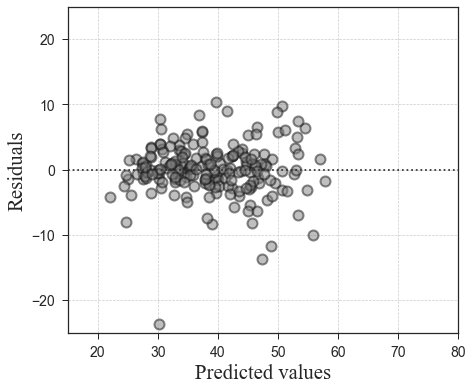

In [18]:
plt.figure(figsize=(7, 6))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
# a=sns.residplot(y=abs(y), x=abs(ytr),label='Train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='Test',scatter_kws={"s": 100,"facecolor": 'grey',"linewidth":2,"edgecolors": 'k',"alpha":0.5})
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

# leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
# leg.get_frame().set_linewidth(1)
# leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim([15,80])
plt.ylim([-25,25])
plt.savefig('dmax_grad_res', bbox_inches="tight")
plt.show()

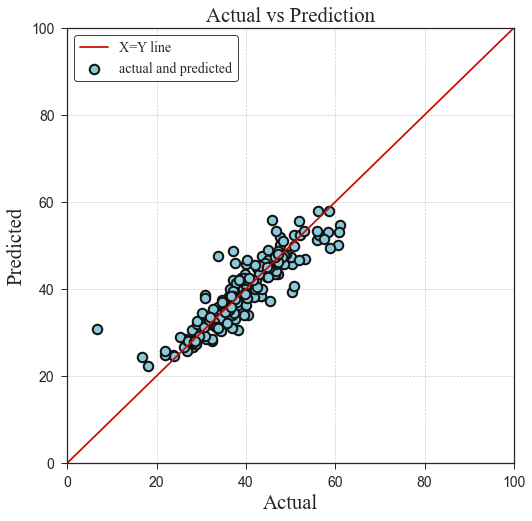

In [41]:

plt.figure(figsize=(8, 8))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.scatter(y_Test,ytestunk, marker = 'o', linewidths = 2, edgecolors = 'k',s=90,facecolors='C5',label='actual and predicted')
plt.plot([0,100],[0,100],color='r',label='X=Y line')
plt.grid(False)
plt.title('Actual vs Prediction', fontsize='xx-large',**csfont)
plt.xlabel('Actual', fontsize='xx-large',**csfont)
plt.ylabel('Predicted', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim([0,100])
plt.ylim([0,100])
# plt.savefig('dmax_grad', bbox_inches="tight")
plt.show()


# plt.grid( linestyle='--')

# plt.rcParams["font.family"] = "Times New Roman"
# plt.legend()

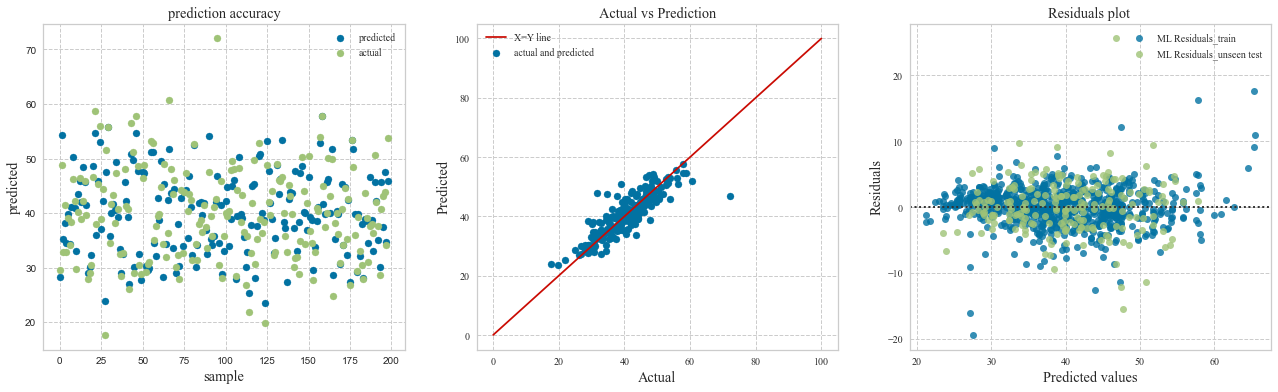

In [10]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,100],[0,100],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()